# 1. Load libraries and datasets.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
train = pd.read_csv('datasets/Train.csv')
test = pd.read_csv('datasets/Test.csv')
ss = pd.read_csv('datasets/SampleSubmission.csv')
variable_data = pd.read_csv('datasets/variable_descriptions.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Train.csv'

In [26]:
train.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [27]:
variable_data

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or bric...,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional d...,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apart...,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house...,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (se...,NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached...,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/ro...,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwel...,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwel...,not in backyard,e.g. in an informal/squatter settlement or on...
9,dw_09,Percentage of dwellings of type: Room/flatlet ...,NaN,NaN


In [28]:
dw_cols = [cols for cols in train if cols.startswith('dw')]
psa_cols = [cols for cols in train if cols.startswith('psa')]
stv_cols = [cols for cols in train if cols.startswith('stv')]
car_cols = [cols for cols in train if cols.startswith('car')]
lln_cols = [cols for cols in train if cols.startswith('lln')]
lan_cols = [cols for cols in train if cols.startswith('lan')]
pg_cols = [cols for cols in train if cols.startswith('pg')]
pw_cols = [cols for cols in train if cols.startswith('pw')]

# 2. Exploratory Data Analysis.

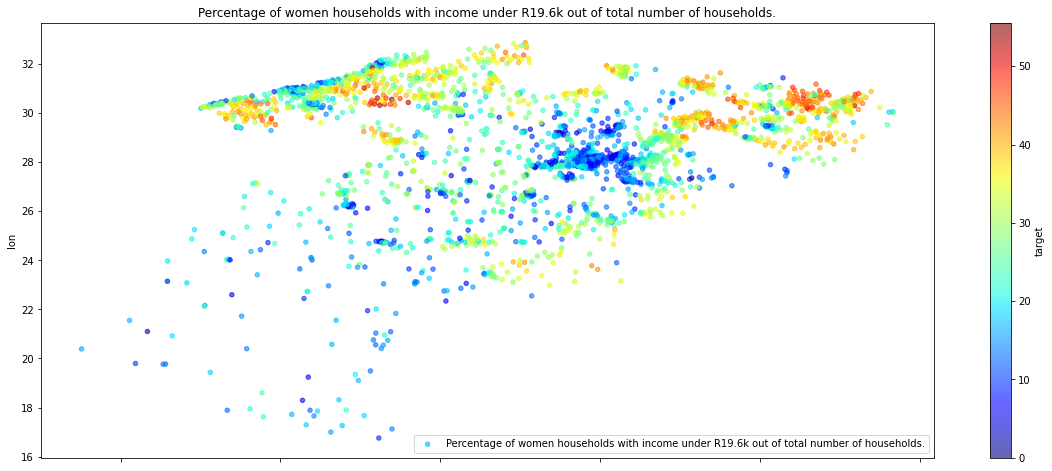

In [7]:
train.plot(kind = 'scatter', x = 'lat', y = 'lon', alpha = 0.6, label = 'Percentage of women households with income under R19.6k out of total number of households.',
           c = 'target', cmap = plt.get_cmap('jet'), colorbar = True,
           figsize = (20, 8))

plt.title('Percentage of women households with income under R19.6k out of total number of households.')
plt.legend()

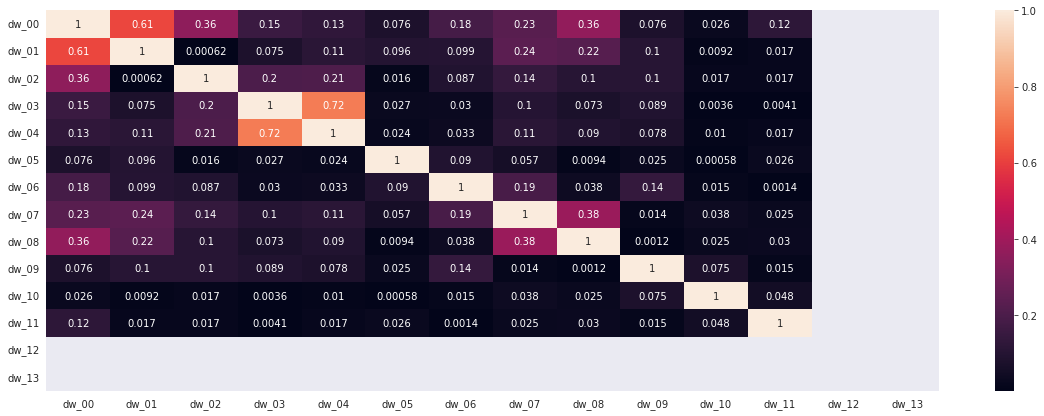

In [45]:
corr = train[dw_cols].corr()
sns.set_style('darkgrid')
plt.figure(figsize = (20, 7))
sns.heatmap(corr.abs(), annot = True)
plt.show()

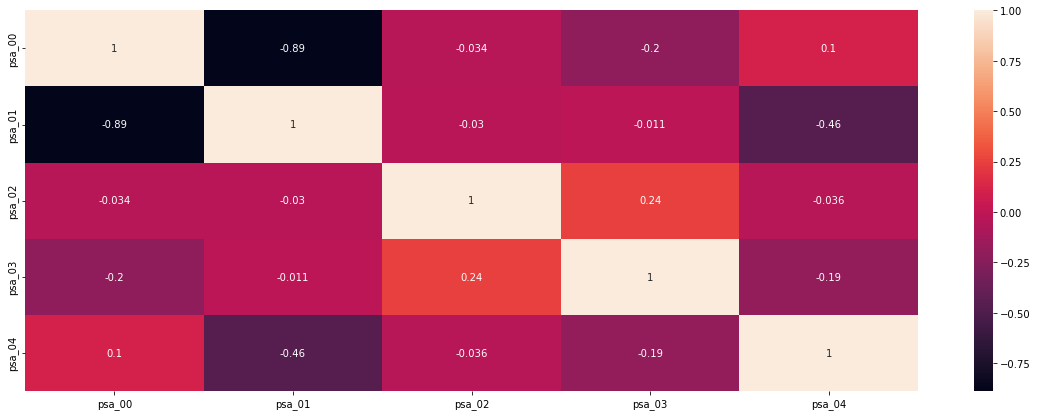

In [9]:
corr = train[psa_cols].corr()
plt.figure(figsize = (20, 7))
sns.heatmap(corr, annot = True)
plt.show()

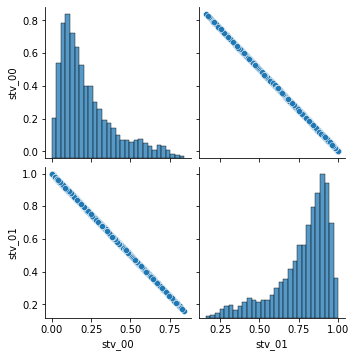

In [10]:
sns.pairplot(train[stv_cols])

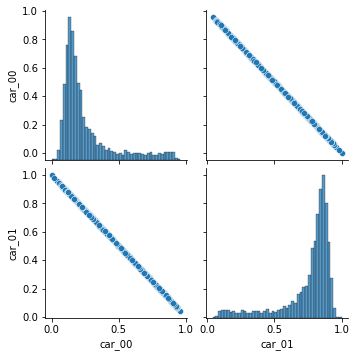

In [11]:
sns.pairplot(train[car_cols])

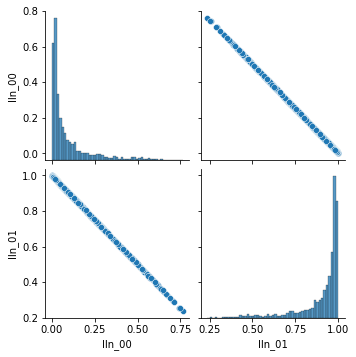

In [12]:
sns.pairplot(train[lln_cols])

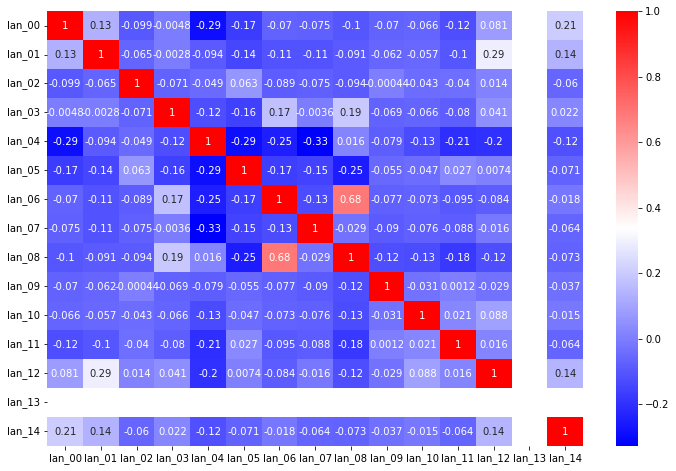

In [13]:
corr = train[lan_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, cmap = 'bwr', annot = True)
plt.show()

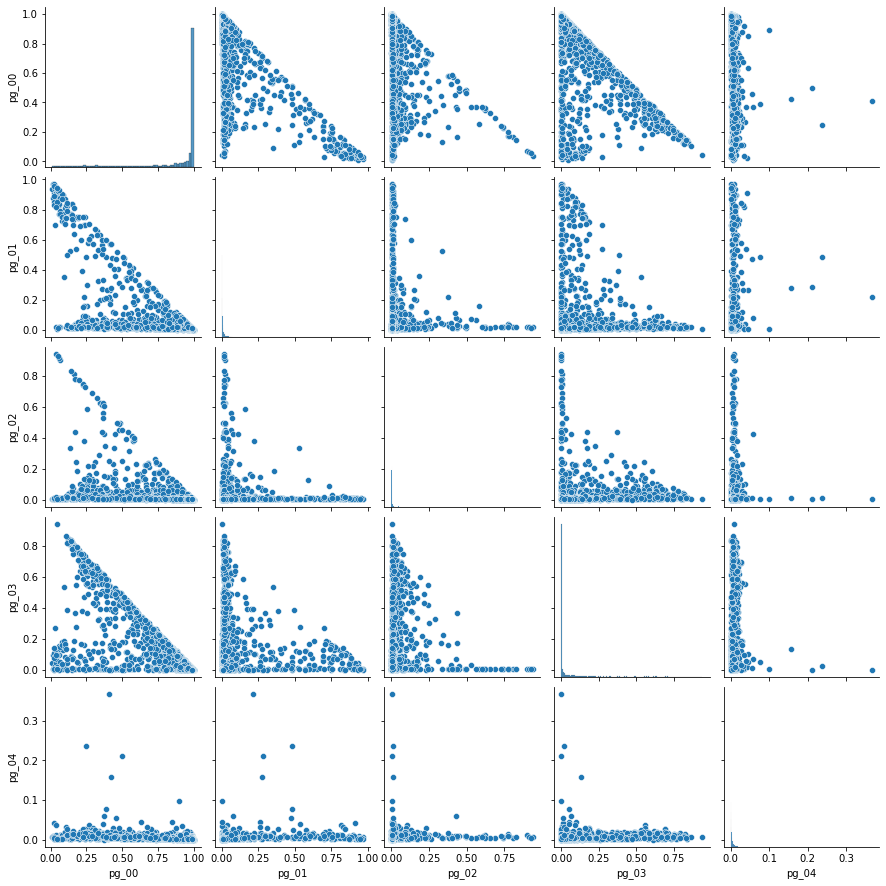

In [14]:
sns.pairplot(train[pg_cols])

<AxesSubplot:>

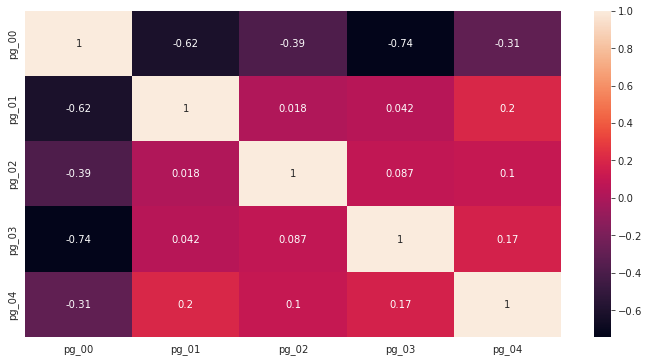

In [48]:
plt.figure(figsize = (12, 6))
sns.heatmap(train[pg_cols].corr(), annot = True)

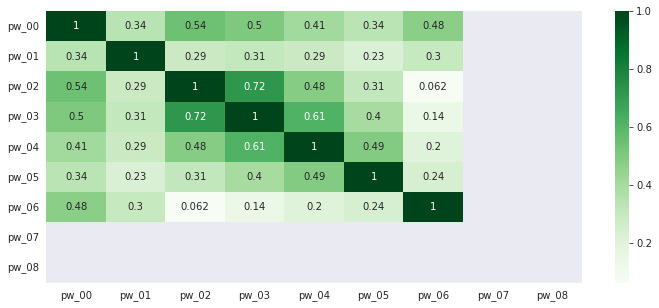

In [54]:
corr = train[pw_cols].corr()
plt.figure(figsize = (12, 5))
sns.heatmap(corr.abs(), annot = True, cmap = 'Greens')
plt.show()

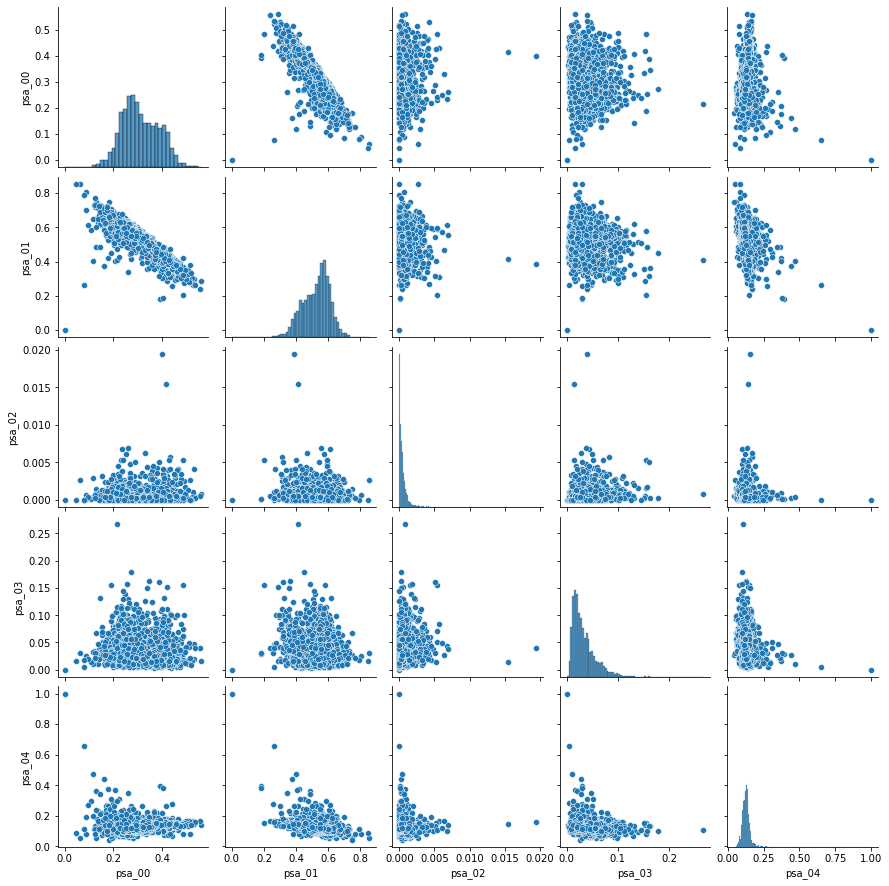

In [17]:
sns.pairplot(train[psa_cols])

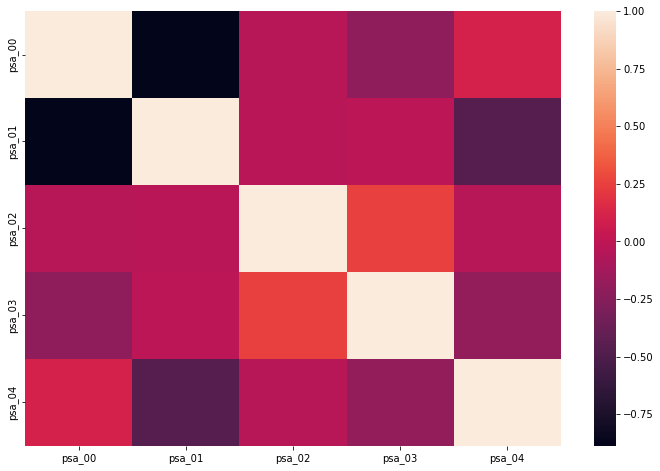

In [17]:
corr = train[psa_cols].corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr)
plt.show()

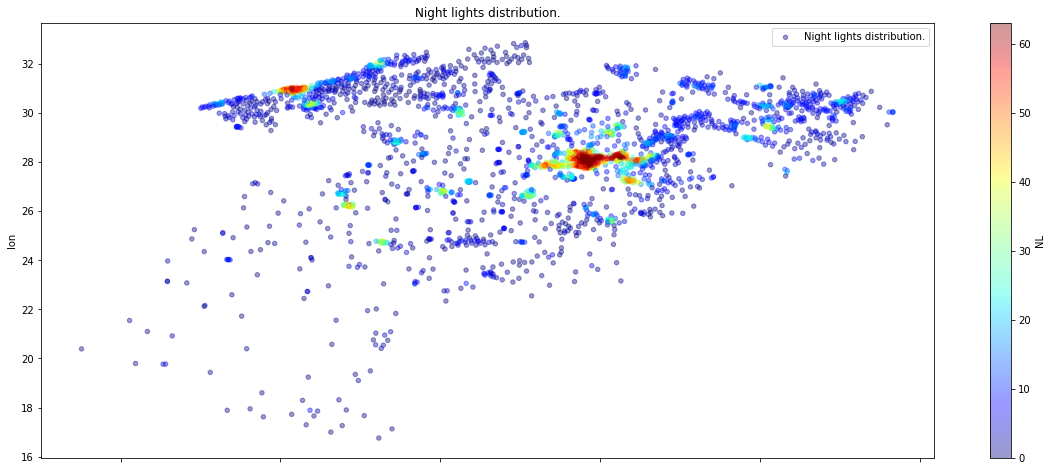

In [51]:
train.plot(kind = 'scatter', x = 'lat', y = 'lon', alpha = 0.4, label = 'Night lights distribution.',
           c = 'NL', cmap = plt.get_cmap('jet'), colorbar = True,
           figsize = (20, 8))

plt.title('Night lights distribution.')
plt.legend()

# 3. Feature engineering.

In [29]:
# Merge columns with high correlation.
for dataset in (train, test):

    dataset['sum_of_stv_cols'] = dataset[stv_cols].sum(axis = 1)

    dataset['sum_of_car_cols'] = dataset[car_cols].sum(axis = 1)

    dataset['sum_of_lln_cols'] = dataset[lln_cols].sum(axis = 1)
    
    dataset['sum_of_dw_cols '] = dataset[dw_cols].sum(axis = 1)
    
    dataset['ratio_stv'] = dataset['stv_01'] / dataset['stv_00']
    
    dataset['ratio_car'] = dataset['car_01'] / dataset['car_00']
    
    dataset['ratio_lln'] = dataset['lln_01'] / dataset['lln_00']
    
    dataset['ratio_psa'] = dataset['psa_01'] / dataset['psa_00']
    
    dataset['ratio_individuals_households'] = dataset['total_individuals'] / dataset['total_households']

In [30]:
PATTERN = r'[\d\s]+:'

for dataset in (train, test):
    dataset['ward_cat'] = dataset['ward'].str.replace(PATTERN, '', regex=True)

In [31]:
#Implement data transformation steps.
categorical_cols = [cols for cols in train.columns if train[cols].dtype == 'object']
categorical_cols

['ward', 'ADM4_PCODE', 'ward_cat']

In [32]:
label_train = train.copy()
label_test = test.copy()

In [33]:
#Preprocessing categorical data.
encoder = OrdinalEncoder(handle_unknown= 'error')

In [34]:
#Encode categorical values.
label_train[categorical_cols] = encoder.fit_transform(label_train[categorical_cols])
label_test[categorical_cols] = encoder.fit_transform(label_test[categorical_cols])

# #Changing option to use infinite as nan.
# pd.set_option('mode.use_inf_as_na', True)
# df.dropna(inplace = True)

#Replace infinite or Nan values and drop Nan values.
label_train.replace([np.inf, -np.inf], np.nan, inplace = True)
label_train.dropna(inplace = True)

label_test.replace([np.inf, -np.inf], np.nan, inplace = True)
label_test.dropna(inplace = True)

In [35]:
cols_to_drop = ['ADM4_PCODE']
#'stv_01', 'lln_01', 'car_01', 'total_households', 'psa_01', 'psa_02', 'psa_03', 'dw_03', 'lan_13', 'lan_06', 'psa_04', 'pw_07', 'pg_00'

In [36]:
label_train = label_train.drop(cols_to_drop, axis = 1)
label_test = label_test.drop(cols_to_drop, axis = 1 )

X = label_train.drop('target', axis = 1)
y = label_train.target
X.shape, y.shape

((2821, 71), (2821,))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2115, 71), (706, 71), (2115,), (706,))

In [1]:
lgbm_params = {'boosting_type' : 'gbdt', 'n_estimators' : 250, 'reg_lambda' : 50,
               'num_leaves' : 81, 'learning_rate' : 0.1, 'device' : 'gpu'}

lgbm = LGBMRegressor(**lgbm_params)
bag_reg = BaggingRegressor(lgbm, bootstrap = True, n_jobs = 6, random_state = 42)

bag_reg.fit(X_train, y_train)
predictions = bag_reg.predict(X_test)
print(f'MSE :{mean_squared_error(predictions, y_test)}')

NameError: name 'LGBMRegressor' is not defined

In [38]:
model = RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs = 6)
model.fit(X_train, y_train)

preds = model.predict(X_test)
mse = mean_squared_error(preds, y_test)
print(f'MSE : {mean_squared_error(preds, y_test)}')

MSE : 11.48550985691193


In [39]:
#label_test = label_test.drop(cols_to_drop, axis = 1)
label_test.shape

(1013, 71)

In [40]:
predictions = model.predict(label_test)

In [41]:
sub_file = ss.copy()
sub_file['target'] = predictions

In [42]:
sub_file.to_csv('submissions/61st_submission.csv', index = False)

In [146]:
corr_matrix = label_train_1[dw_cols].corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

#Columns with highly correlated features. (r > 0.6)
to_drop = [col for col in label_train_1[dw_cols].columns if any (label_train_1[col] >  0.90)]
to_drop

0        0
1       42
2       53
3       64
4       75
        ..
2817     0
2818    42
2819    53
2820    64
2821    75
Length: 2822, dtype: int64